In [1]:
from cheaper.params import CheapERParams
from pipeline import cheaper_train
from pipeline import get_datasets

# get datasets
datasets = get_datasets()
beers_dataset = datasets[5]

In [2]:
# cheapER parameters' settings
params = CheapERParams()
params.epochs = 15
params.models = ['distilroberta-base']
params.adaptive_ft = False
params.lr = 2e-6
params.lr_multiplier = 10
params.sigma = 1000
params.kappa = 100
params.threshod = 0.5
params.slicing = [0.33]

CheapER: training on dataset "beers"
CheapER: using params "sigma=1000,kappa=100,epsilon=0,adaptive_ft=False,num_runs=1,normalize=True,sim_length=5,warmup=False,epochs=15,lr=2e-06,attribute_shuffle=False,identity=False,symmetry=False,models=['distilroberta-base'],slicing=[0.33],compare=False,generated_only=True,approx=perceptron,balance=[0.5, 0.5],adjust_ds_size=False,batch_size=8,silent=True,deeper_trick=True,consistency=False,sim_edges=True,simple_slicing=True,use_model=noisy-student,teaching_iterations=3,lr_multiplier=10,data_noise=True,temperature=None,discard_old_data=False,use_scores=False,threshold=0.5"
Generating dataset
Parsing original dataset
min coseno match:0.2773500981126146
88
40
88
match_tuple: 40
no match_tuple: 88
No_match_with_cos_too_small: 2


Some weights of the model checkpoint at distilroberta-base were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.bias', 'lm_head.dense.bias', 'lm_head.decoder.weight', 'lm_head.dense.weight', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at distilroberta-base and are newly initialized: ['classifier.out_proj.bias

------------- Teacher Training distilroberta-base ------------------
Training with 128 record pairs (33.0% GT)
Using custom data configuration default-92e406152ee4f750


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Dataset csv downloaded and prepared to /home/tteofili/.cache/huggingface/datasets/csv/default-92e406152ee4f750/0.0.0/bf68a4c4aefa545d0712b2fcbb1b327f905bbe2f6425fbc5e8c25234acb9e14a. Subsequent calls will reuse this data.
Using custom data configuration default-26f7126689881a32


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Dataset csv downloaded and prepared to /home/tteofili/.cache/huggingface/datasets/csv/default-26f7126689881a32/0.0.0/bf68a4c4aefa545d0712b2fcbb1b327f905bbe2f6425fbc5e8c25234acb9e14a. Subsequent calls will reuse this data.


  0%|          | 0/128 [00:00<?, ?ex/s]

  0%|          | 0/91 [00:00<?, ?ex/s]

***** Running training *****
  Num examples = 128
  Num Epochs = 15
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 240


Epoch,Training Loss,Validation Loss,F1
1,No log,0.631979,0.000000
2,No log,0.614828,0.000000
3,No log,0.600596,0.000000
4,No log,0.586964,0.000000
5,No log,0.573845,0.000000
6,No log,0.562543,0.000000
7,No log,0.553129,0.000000
8,No log,0.545093,0.000000
9,No log,0.538347,0.000000
10,No log,0.532898,0.000000


***** Running Evaluation *****
  Num examples = 91
  Batch size = 32
***** Running Evaluation *****
  Num examples = 91
  Batch size = 32
***** Running Evaluation *****
  Num examples = 91
  Batch size = 32
***** Running Evaluation *****
  Num examples = 91
  Batch size = 32
***** Running Evaluation *****
  Num examples = 91
  Batch size = 32
***** Running Evaluation *****
  Num examples = 91
  Batch size = 32
***** Running Evaluation *****
  Num examples = 91
  Batch size = 32
***** Running Evaluation *****
  Num examples = 91
  Batch size = 32
***** Running Evaluation *****
  Num examples = 91
  Batch size = 32
***** Running Evaluation *****
  Num examples = 91
  Batch size = 32
***** Running Evaluation *****
  Num examples = 91
  Batch size = 32
***** Running Evaluation *****
  Num examples = 91
  Batch size = 32
***** Running Evaluation *****
  Num examples = 91
  Batch size = 32
***** Running Evaluation *****
  Num examples = 91
  Batch size = 32
***** Running Evaluation *****
  N

***** Eval results after epoch -1 *****
eval_loss: 0.5250337322552999
f1_score: 0.0
report:               precision    recall  f1-score   support

           0       0.85      1.00      0.92        77
           1       0.00      0.00      0.00        14

    accuracy                           0.85        91
   macro avg       0.42      0.50      0.46        91
weighted avg       0.72      0.85      0.78        91

simple_accuracy: 0.8461538461538461
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        77
           1       0.00      0.00      0.00        14

    accuracy                           0.85        91
   macro avg       0.42      0.50      0.46        91
weighted avg       0.72      0.85      0.78        91

Generating dataset
Parsing original dataset
min coseno match:0.2773500981126146
219
40
219
match_tuple: 40
no match_tuple: 219
No_match_with_cos_too_small: 9
match number: 40 no match number: 45


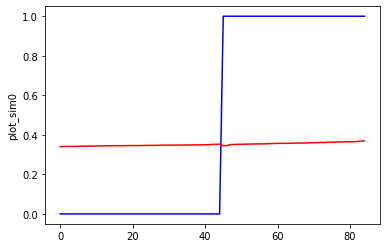

min_sim_Match 0.5max_sim_noMatch 0.5
!max_sim 0.5
!min_sim 0.5
--------------- Generating datasets --------------
min_cos_sim 0.2773500981126146
4345
3000
4345
3000
4345
LSH blocking started
903 pairs found
LSH blocking done


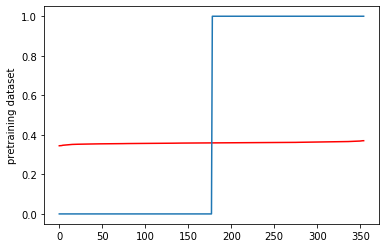

0 positive pairs found via LSH blocking and high similarity check
355 negative pairs found via LSH blocking and low similarity check
max pair visit: 5000
dizionari
listL_match[0]
0


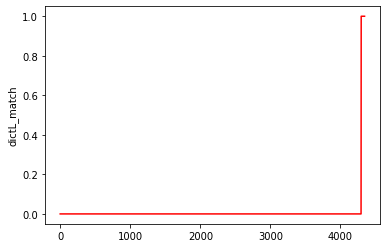

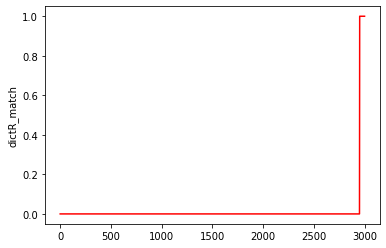

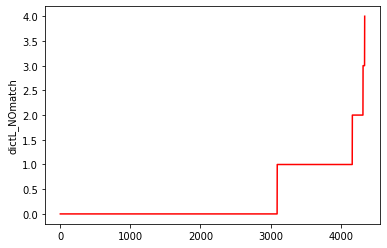

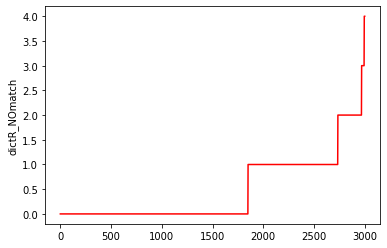

create candidates set
0 matches, 1455 non-matches, 100 consistency pairs
dizionari occorrenze degli attributi del dataset di pt


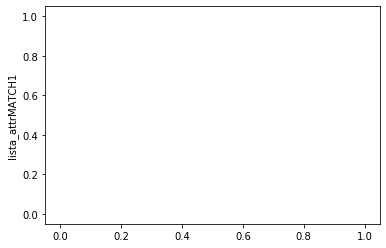

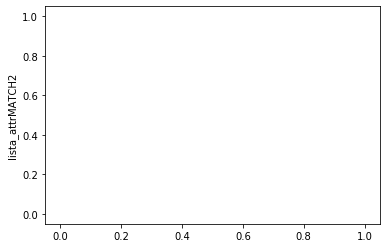

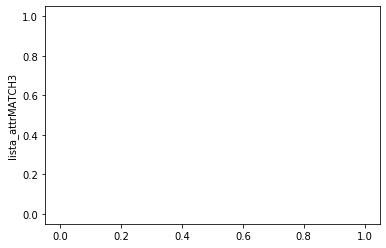

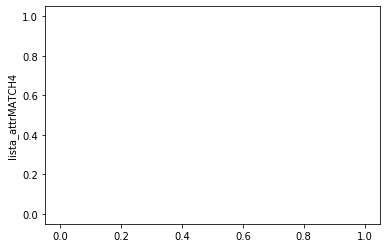

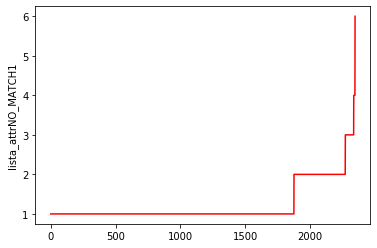

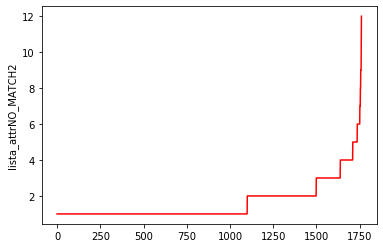

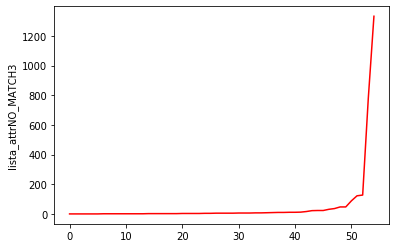

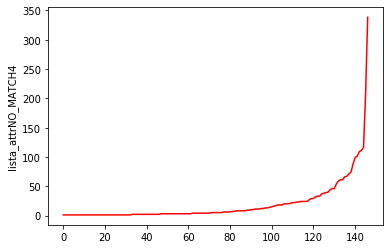

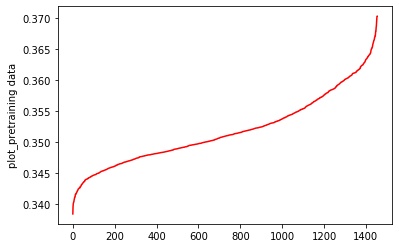

k_slice 500


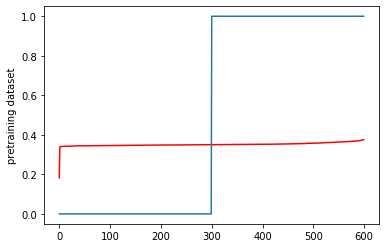

--------------- data augmentation creating dataset --------------
using threshold=0.5 to approximate label
discarded 0 elements


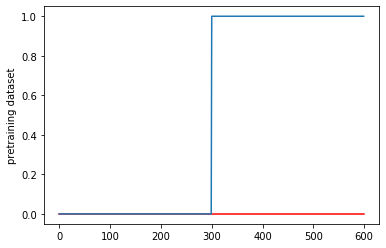

Previous generated dataset size: 0
New generated dataset size: 600


loading configuration file https://huggingface.co/distilroberta-base/resolve/main/config.json from cache at /home/tteofili/.cache/huggingface/transformers/42d6b7c87cbac84fcdf35aa69504a5ccfca878fcee2a1a9b9ff7a3d1297f9094.aa95727ac70adfa1aaf5c88bea30a4f5e50869c68e68bce96ef1ec41b5facf46
Model config RobertaConfig {
  "architectures": [
    "RobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 6,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "transformers_version": "4.12.5",
  "type_vocab_size": 1,
  "use_cache": true,
  "vocab_size": 50265
}

loading file https://huggingface.co/distilroberta-base/resolve/main/vocab.json 

------------- Student Training distilroberta-base -----------------
Training with 728 record pairs (600 generated, 128 GT)
Using custom data configuration default-e0af1902071a1f78


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Dataset csv downloaded and prepared to /home/tteofili/.cache/huggingface/datasets/csv/default-e0af1902071a1f78/0.0.0/bf68a4c4aefa545d0712b2fcbb1b327f905bbe2f6425fbc5e8c25234acb9e14a. Subsequent calls will reuse this data.
Using custom data configuration default-f6fdb7a152b16bdf


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Dataset csv downloaded and prepared to /home/tteofili/.cache/huggingface/datasets/csv/default-f6fdb7a152b16bdf/0.0.0/bf68a4c4aefa545d0712b2fcbb1b327f905bbe2f6425fbc5e8c25234acb9e14a. Subsequent calls will reuse this data.


  0%|          | 0/728 [00:00<?, ?ex/s]

  0%|          | 0/91 [00:00<?, ?ex/s]

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
***** Running training *****
  Num examples = 728
  Num Epochs = 15
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 1365


Epoch,Training Loss,Validation Loss


In [ ]:
results_df = cheaper_train(beers_dataset, params)
print(results_df)